# Importing Libraries

In [2]:
# Importing Important Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation and Cleaning

In [3]:
# Data Preparation
# Read the csv into a DataFrame
df = pd.read_csv("HeartDiseaseTrain-Test.csv")

In [4]:
# Printing the head to show dataframe columns
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [5]:
# Using describe function to understand data
df.describe()

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.513171
std,9.072290,17.516718,51.59251,23.005724,1.175053,0.500070
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,1.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,1.000000


In [6]:
# Removing empty entities if any from the Data for better visualization and understanding of the data
df = df.dropna()

In [7]:
# Checking if there are any changes that needs to be done
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

# PLOTS

## Bar Plot

In [21]:
def plot_barplot():
    """
    Function to create a bar chart for Chest Pain Type.
    """
    chest_pain_counts = df['chest_pain_type'].value_counts()
    plt.bar(chest_pain_counts.index, chest_pain_counts, color='orange', edgecolor='black')
    plt.title('Chest Pain Type Distribution')
    plt.xlabel('Chest Pain Type')
    plt.ylabel('No. of Patients')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.savefig('barplot.png')
    plt.show()

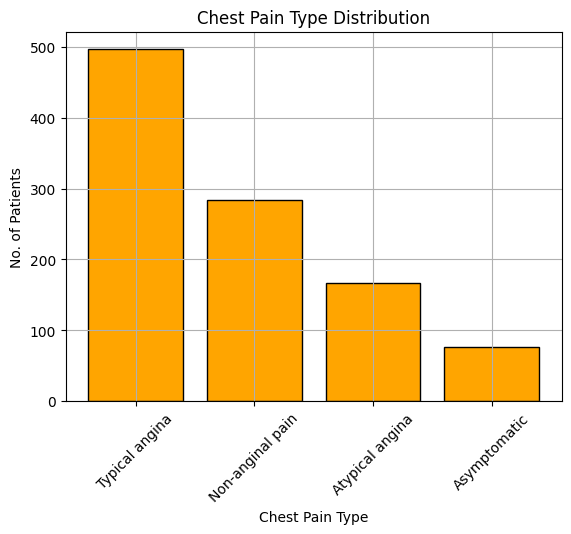

In [22]:
plot_barplot()

## Pie Chart

In [45]:
def plot_piechart():
    """
    Function to create a pie chart for Fasting Blood Sugar.
    """
    fbs_counts = df['fasting_blood_sugar'].value_counts()
    plt.pie(fbs_counts, labels=fbs_counts.index, autopct='%1.1f%%', colors=[ 'lightgreen','coral'], wedgeprops=dict(width=0.7, edgecolor='black'))
    plt.title('Fasting Blood Sugar Distribution')
    plt.savefig('piechart.png')
    plt.show()

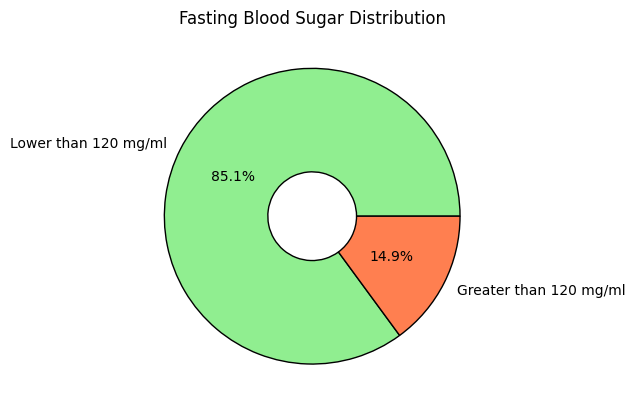

In [46]:
plot_piechart()

## Scatter Plot

In [17]:
# Function For plotting a violin plot
def plot_scatterplot():
    """
    Function to create a scatter plot for Resting Blood Pressure vs Cholesterol.
    """
    plt.scatter(df['age'], df['Max_heart_rate'], c=df['target'], cmap='viridis', alpha=0.8)
    plt.colorbar(label='0 = No Heart Disease  1 = Heart Disease', ticks=[df['target'].min(), df['target'].max()])
    plt.title('Age vs Heart Rate')
    plt.xlabel('Age')
    plt.ylabel('Heart Rate')
    plt.grid(True)
    plt.savefig('ScatterPlot.png')
    plt.show()

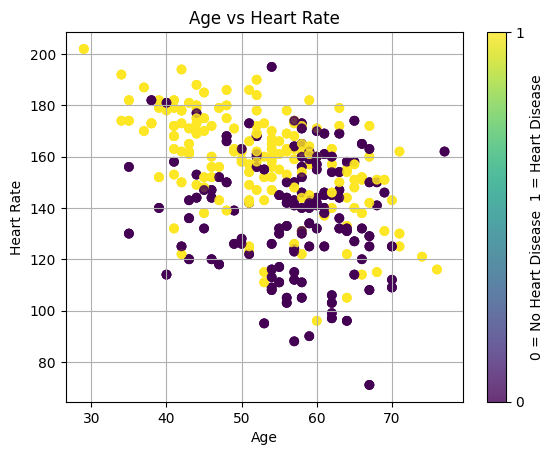

In [18]:
plot_scatterplot()

## Correlation Matrix

In [15]:
# Function For plotting a Heatmap from Correlation Matrix
def plot_heatmap():
    """
    Function to create a correlation matrix heatmap.
    """
    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.savefig('heatmap.png')
    plt.show()

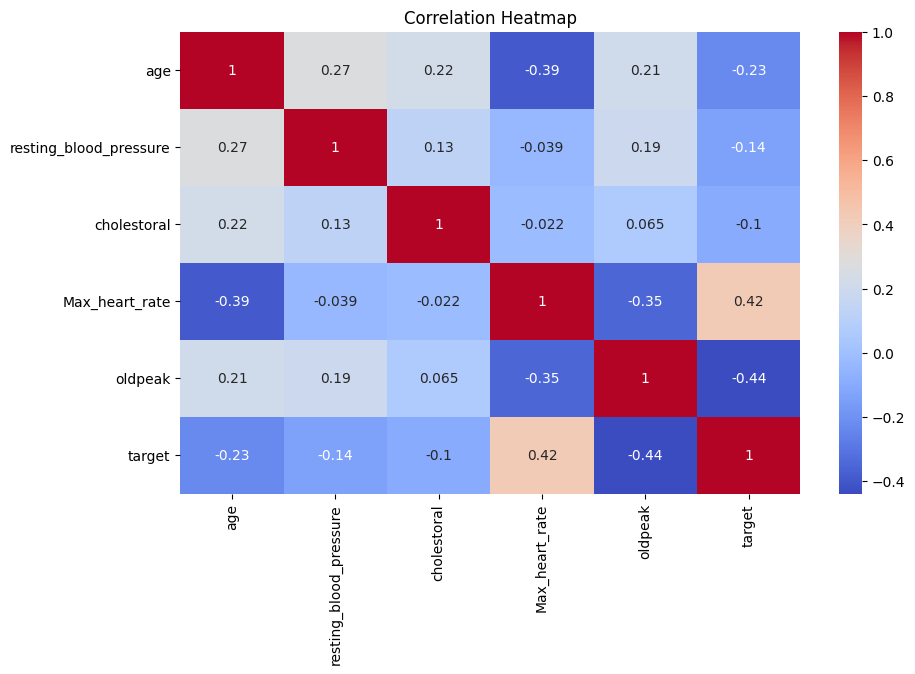

In [16]:
plot_heatmap()

## Violin Plot

In [27]:
# Function For plotting a violin plot
def plot_violinplot():
    """
    Function to create a violin plot representing Age distribution for patients having Excercise Induced Angina.
    """
    #creating a new dataframe for all the patients haivng exercise induced angina.
    df_angina = df[df['exercise_induced_angina'] == 'Yes']
    plt.figure(figsize=(5, 4))
    sns.violinplot(x='exercise_induced_angina', y='age', data=df_angina, palette='pastel')
    plt.title('Violin Plot of Age Distribution by Exercise Induced Angina')
    plt.xlabel('Exercise Induced Angina')
    plt.ylabel('Age')
    plt.grid(True)
    plt.savefig('violinplot.png')
    plt.show()
    


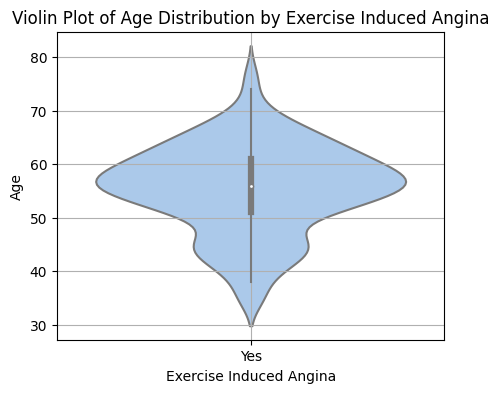

In [28]:
plot_violinplot()